![DSB logo](img/Dolan.jpg)
# Getting Started with Pandas

## PD4E Chapter 1: Pandas DataFrame Basics
### How do you read/manipulate/store data in Python?

_Lecture Slides v 0.1, Developed by Dr. Jie Tao_

# What You Learned in Python that could Apply Here

You will need following knowledge from the first half of this course:
1. relative directories
2. functions (definition & calling)
3. dot notation (for methods)
4. primitive Python containers
5. Variable and their assignments

# What You will Learn in this Chapter

You will learn following techniques in this chapter:
1. Loading data into Pandas
2. Subset data
3. Slicing data
4. Filtering data
5. Basic Pandas data structures (Series and DataFrame)
6. Resemble other Python data types (list, array, Numpy array)
7. Basic indexing

# Learning Objectives

This chapter will cover:
1. Loading a simple dilimited data file;
2. Counting how many rows/columns were loaded;
3. Determining the type of data being loaded;
4. Looking at different subsets of rows and columns.

# Use Pandas

Since `Pandas` is a standard Python Package/Library, we need to import it.

```python
import pandas
```
But as a convention, we tend to give pandas a "nickname" for pandas.


```python
import pandas as pd
```

# Loading Your First Dataset

When `pandas` is loaded, we can use a method called `.read_csv()` to load dataset. 
- like other methods in Python packages, we use _dot notation_ to call the method.
    - refer to Appendices __H, O__, and __S__ for more details if you need a refresher of _dot notations_.
- Even though the method name is `read_csv()`, where csv stands for comma-separated values, this method can read data files using othe dilimters (e.g., tabs, which is also very pouplar, aka., TSV)
- `read_csv()` is a very powerful function, we use a lot of the arguments to customize the read-in of our data
    - refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for more details.

In [2]:
import pandas as pd # naming convention, just do it like this
# since now we name `pandas` as `pd`, we should use `pd` in place
# `my_first_df` is the variable we created for the data we read-in
# we created a variable so we can reuse it when needed
# you ALWAYS create a variable to store the data you read in
# please use this path on your own `'/srv/data/my_shared_data_folder/ba505-data/gapminder.tsv'`
my_first_df = pd.read_csv('/srv/data/my_shared_data_folder/ba505-data/gapminder.tsv', sep = '\t') # `\t` refers to tab separators

In [22]:
# `my_first_df` is a variable in the data type Data Frame
# Data Frame is one of the basic data types in Pandas
# Think of DFs as your spread sheets - with rows and columns
# now let's test if `my_first_df` is a DF
type(my_first_df)

pandas.core.frame.DataFrame

In [23]:
# make sure the data is fully loaded
my_first_df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


# How Many Rows and Columns?

- Since DFs are similar to spread sheets, with rows and columns, the first piece of information we would need from them are # of rows and # of columns. 
- there are many ways to find that information, but the simplest way is to use a built-in attribute of DFs, namely `.shape`.
    - For now you can think of attribute as methods without the ()
- `.shape` returns a two-element tuple (refer to Chap 10 in PY4E text for information)
    - The first element is # of rows, the second is # of columns
    - We can slice a tuple by use the indices of the elements


In [24]:
# Since DFs are similar to spread sheets, with rows and columns
# the first piece of information we would need from them is 
# number of rows and columns 
# there are many ways to find that information
# but the simplest way is to use a built-in attribute of DFs, namely `.shape`
# For now you can think of attribute as methods without the ()
my_first_df.shape

(1704, 6)

In [25]:
# what if we just need number of rows?
# note that the result is an integer
my_first_df.shape[0]
my_first_df.shape[0]

1704

In [9]:
# if you accidentally treat an attribute as a method
# you will get an error 
my_first_df.shape()

TypeError: 'tuple' object is not callable

# What data are included in the dataset?

- The second most important information is what data are included. Although this is not an easy task, but at least we can learn a little bit from _column names_.
- Pandas provides another attribute for that `.columns`

In [26]:
my_first_df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

# Your Turn Here

Can you find out what is the data type of the columns?

# What types of data are included in the dataset?
- `Pandas` DataFrame object are similar to DataFrame objects in other languages (e.g., R)
    - each column (`Series`) contains the __same__ data type
    - each row can contain mixed data types
    - We can use our common senses to "guess" the data type of each column
    - But the best is to use the built in `.dtypes` attribute 

In [11]:
my_first_df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

# Pandas - Python Data Types Mapping

| Pandas Type | Python Type | Description |
| ----------- | ----------- | ------------|
| object | string | most common data type |
| int64 | int | integers |
| float64 | float | decimal numbers |
| datetime64 | datetime | `datetime` in Python stardard packages |

# Putting it All Together

`Pandas` provides a method `.info()` that offers all general information of a DF together.

```python
df.info()
```

In [12]:
my_first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


# Inspecting Rows, Columns, & Cells

- With the data loaded, we can always use `print()`, or even just call the name of the DF, to look at all the data
- But with today's data, we often have too many cells in the dataset to look at
    - so we often are interested in a subset of the data
    - Pandas provides `.head()` and `.tail()` methods to look at the first/last 5 rows of the DF

In [14]:
# first five rows of 'my_first_df`
# Note that row index starts at 0
my_first_df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [15]:
# last five rows of `my_first_df`
my_first_df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


# Subsetting Column by Name

- There are several ways to look at the columns in a DF: we can specify by _name_, _position_, or _ranges_
- If we want to use name to specify a column, you can use a square bracket (`[]`) after the DF name
- Remember that when we subset a column, we get a `pandas.Series` data type

In [27]:
# select `country` column
country_df = my_first_df['country']
# show first 5 values
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [17]:
type(country_df)

pandas.core.series.Series

# Selecting Multiple Columns by Name

- We can select more than 1 columns from any DF
    - when we select 1 column, we put in a `string` in the square brakets (`[]`)
    - when we need to select more than 1 columns, we put in a `list` of `strings` in in the square brakets (`[]`)
- In `pandas` v0.20 and later versions, positional referencing of columns are no longer supported
    - which means you cannot pass an `integer` or a list of `integers` in the square brakets (`[]`)

In [28]:
# selecting `country`, `continent` and `year`
subset_df = my_first_df[['country', 'continent', 'year']] # note the double [[]] indicates a list
# You should have the habit of using `.head()` to test if your operation to the DF works as expected
subset_df.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


# Subsetting Rows by Index
- We can subset a column, or multiple columns from a DF, using the name(s)
- whereas with rows, we do not have names
    - but look at the DF, we have the first column that has no name
    - this column is called `index`, which is the `index` of rows
    - we can use them to subset row(s) - we can use the `.loc[]` method

In [19]:
# we can access the `index` of a DF like below
my_first_df.index

RangeIndex(start=0, stop=1704, step=1)

In [23]:
# when we need the first row, which the index of label is `0`
# we can use `0` as the value in the `.loc[]` method
# you can remember it as with positioning, we always use `[]`
my_first_df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [21]:
# Get the 100th row - note that the index label is `99`
my_first_df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

In [22]:
# since this is similar to the list indexing
# can we use the list indexing method to get the last row (`[-1]`)
my_first_df.loc[-1]

KeyError: 'the label [-1] is not in the [index]'

# What Went Wrong?

- Remember how `.loc[]` works? 
    - it actively look for whatever label you put in
    - above error shows that `.loc[]` looks for `-1` in the index labels
    - where `-1` cannot be found - hence the error

In [23]:
# the correct way of gettig the last row
# remeber we can use shape to get numbers of rows & columns
# the first element is the number of rows
# also we know that the last row index label is the (numbers of rows - 1)
# now we can do it that way
my_first_df.loc[my_first_df.shape[0] - 1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [24]:
# but there is a much easier way to do that
# `.tail()` method takes arguments - means how many rows we want to retrieve
# the default value is 5 - that's how we can get the last 5 rows
# same works for `.head()`
my_first_df.tail(1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


# Subsetting Multiple Rows

- Similarly, we can use a list of values as input, to select multiple rows

In [26]:
# make sure you use double squared brackets to indicate a list
my_first_df.loc[[0, 99, 999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


# Subsetting Rows by Row Number

- So far, we have been using the _row names_ to subset row(s)
- However, we can also use position(s) - e.g., _row number(s)_ to subset row(s)
    - we can use the `.iloc[]` method for positional subsetting of row(s)
    - Note that if the index of rows are integers, `.iloc[]` and `.loc[]` work the same

In [38]:
my_first_df.loc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object

In [39]:
# same as above
my_first_df.iloc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object

In [41]:
# only difference is that now `-1` works
my_first_df.iloc[-1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

# Subsetting Columns using `.iloc[]`/`.loc[]`
- So far we have been using `.iloc[]`/`.loc[]` to subset rows
- Similar methods can be used to subset columns
    - to do that we need to use the slicing method in Python (Appendix __L__ in __PD4E__)
    - when selecting columns, we select a subset of columns - and in the meanwhile we select _all_ rows with these columns
    - we can use a colon (`:`) 
        - if we just use a colon, that means everything
    - `.iloc[]`/`.loc[]` takes a second argument, it works like
```python
df.loc[:,[column]]
```

In [29]:
# suppose we just want to subset 'year' and 'pop' columns
subset_df2 = my_first_df.loc[:,['year', 'pop']]
subset_df2.head()


,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [30]:
# `iloc` also works
subset_df3 = my_first_df.iloc[:,[2, 4, -1]]
subset_df3.head()

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


In [31]:
# we can also use a range of values to subset rows/columns
small_range = list(range(5))
small_range

[0, 1, 2, 3, 4]

In [32]:
# first 5 rows
# `iloc` works the same
my_first_df.loc[small_range]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [33]:
# first 5 columns
# note we can only use `iloc` here
my_first_df.iloc[:,small_range].head()

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460


In [34]:
# you can specify a particular range
new_range = list(range(3, 6))
new_range

[3, 4, 5]

In [40]:
my_first_df.iloc[:,new_range].head()

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106


In [35]:
# you can even select every other column
# `range()` function takes a third argument `step`, default is 1
# when set `step=2`, we can get every other columns
my_first_df.iloc[:,list(range(0,6,2))].head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [46]:
list(range(0,6,2))
# 2 يعني انقز اثنين يامعلم
#-1 ريوس

[0, 2, 4]

In [42]:
# now we can slice the DF 
my_first_df.iloc[:, :3].head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [56]:
# similarly, a specific range
my_first_df.iloc[:, 2:5].head()

,year,lifeExp,pop
0,1952,28.801,8425333
1,1957,30.332,9240934
2,1962,31.997,10267083
3,1967,34.020,11537966
4,1972,36.088,13079460


In [58]:
# select every other columns with the first 5 rows
my_first_df.iloc[:5, 0:6:2]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


# Your Turn Here

Experiment with following code, and explan how they works in your comments.
```python
my_first_df.iloc[:, 0:6:]
my_first_df.iloc[:, 0::2]
my_first_df.iloc[:, :6:2]
my_first_df.iloc[:, ::2]
my_first_df.iloc[:, ::]
```

In [48]:
my_first_df.iloc[:, 0::2]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


# Locating a Cell
- We have been using colon (`:`) to slice/subset columns/row
    - by doing that, we select all the rows with selected columns
- However, sometimes, we want to locate a specific cell
    - we can also use `.loc[]`/`.iloc[]` for that

In [2]:
# using `.loc[]`
# first argument is the row label, second argument is the name of the column
# note that the cell value you retrieved is a string
my_first_df.loc[42, 'country']

'Angola'

In [4]:
# using `.iloc[]`
# similar as above, but instead of column names as the second argument, we use the position
my_first_df.iloc[42, 0]

'Angola'

In [5]:
# Note that `.loc[]` does not work with column position
my_first_df.loc[42, 0]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

# Subsetting Multiple Cells

- We can combime subsetting of rows and columns together to select a certain range of cells
    - refer to the [Pandas doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for more details

In [49]:
# get the 1st, 100th, and the 1000th rows
# from the 1st, 4th, and 6th columns
# the columns we expect to get are 
# country, lifeExp, and gdpPercap
my_first_df.iloc[[0, 99, 999], [0, 3, 5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [8]:
# Similarly, we can use `.loc[]` for the same purpose
# instead of using the column positions `[0, 3, 5]`
# we use the column names `['country', 'lifeExp', and 'gdpPercap']`
# this provides more readability to our code - PREFERRED WAY
my_first_df.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


# Describe a DF

Sometimes we need a more data-oriented overview of a DF, `pandas` provides a method for that:
```python
df.describe()
```

Refer to the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for details.

In [9]:
my_first_df.describe()# يشتغل بس على الارقام البلد والثاني مايطلع

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


# Basic Plotting

- Data visualization is a very important way of communicating and reporting on your data
    - we use visuals to understand the data, convey the ideas, or show trends in our data
- `pandas` provides a `.plot()` method to create basic plots off your DF, or even columns/rows of your DF


In [36]:
# let's subset a DF using data from 'Mongolia'
# note that a column in a DF is an attribute 
mongolia_df = my_first_df[my_first_df.country == 'Mongolia']
#mongolia_df.reset_index().set_index('year')
mongolia_df.head()

,country,continent,year,lifeExp,pop,gdpPercap
996,Mongolia,Asia,1952,42.244,800663,786.566857
997,Mongolia,Asia,1957,45.248,882134,912.662609
998,Mongolia,Asia,1962,48.251,1010280,1056.353958
999,Mongolia,Asia,1967,51.253,1149500,1226.041130
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


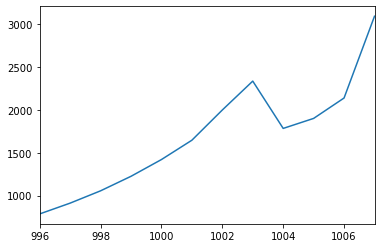

In [37]:
# Let's show the trend of `gdpPercap` of Mongolia
# below command (start with %) force jupyter to show graph in the notebook
%matplotlib inline 
mongolia_df.gdpPercap.plot()

# Your Turn Here
Finish exercises below by following instructions of each of them.

# Q1. Coding Question

Follow steps below to create a `pandas` DF and investigate the data in it.

In [4]:
import pandas as pd
# Step 0: creating a DF using the data below
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
'score': [88, 59, 76.5, 0, 55, 100, 94.5, 0, 58, 89],
'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
# note how we created the DF - particularly how do we specify the index of DF
exam_df = pd.DataFrame(exam_data, index=labels)


### Step 1: show the first 3 rows of `exam_df`

_hint_: `.head()` may be helpful here.

In [4]:
# Step 1: show the first 3 rows of `exam_df`
# write your code here
exam_df.head()


,name,score,attempts,qualify
a,Anastasia,88.0,1,yes
b,Dima,59.0,3,no
c,Katherine,76.5,2,yes
d,James,0.0,3,no
e,Emily,55.0,2,no


In [53]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
name        10 non-null object
score       10 non-null float64
attempts    10 non-null int64
qualify     10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


### Step 2: show the last 2 rows of `exam_df`
_hint_: `.tail()` may be helpful here.

In [5]:
# Step 2: show the last 2 rows of `exam_df`
# write your code here
exam_df.tail(2)

,name,score,attempts,qualify
i,Kevin,58.0,2,no
j,Jonas,89.0,1,yes


### Step 3: How many students (rows) are included in `exam_df`?

_hint_: `.shape` may be helpful here.

In [6]:
# Step 3: How many students (rows) are included in `exam_df`?
# write your code here
exam_df.shape[0]

10

### Step 4: How many features (columns) are included in `exam_df`?
_hint_: `.shape` may be helpful here.

In [43]:
# Step 4: How many features (columns) are included in `exam_df`?
# write your code here
exam_df.shape[1]

4

### Step 5: What are the data types of the columns in `exam_df`?
_hint_: `.dtypes` may be helpful here.

In [44]:
# Step 5: What are the data types of the columns in `exam_df`?
# write your code here
exam_df.dtypes

name         object
score       float64
attempts      int64
qualify      object
dtype: object

### Step 6: subset the fourth ('James') to the eighth ('Laura') student in another DF
- call the subset DF `subset_df1`, 
- use `.loc[]` __ONLY__

In [8]:
# Step 6: subset the fourth ('James') to the eighth ('Laura') student in another DF
# call the subset DF `subset_df1`, use `.loc[]`
# write your code here
subset_df1 = exam_df.loc['d':'h',:]
subset_df1

,name,score,attempts,qualify
d,James,0.0,3,no
e,Emily,55.0,2,no
f,Michael,100.0,3,yes
g,Matthew,94.5,1,yes
h,Laura,0.0,1,no


### Step 6.1: subset the fourth ('James') to the eighth ('Laura') student in another DF
- call the subset DF `subset_df2`, 
- use `.iloc[]` __ONLY__

In [9]:
# Step 6.1: subset the fourth ('James') to the eighth ('Laura') student in another DF
# call the subset DF `subset_df1`, use `.iloc[]`
# write your code here
subset_df2 = exam_df.iloc[3:8,:]
subset_df2

,name,score,attempts,qualify
d,James,0.0,3,no
e,Emily,55.0,2,no
f,Michael,100.0,3,yes
g,Matthew,94.5,1,yes
h,Laura,0.0,1,no


### Step 7: subset every other student, starting from the second student ('Dima') 
- call the subset DF `subset_df3`
- use `.loc[]` or `.iloc[]`

In [10]:
# Step 7: subset every other student, starting from the second student ('Dima')
# call the subset DF subset_df3, use .loc[] or .iloc[]
# write your code here
subset_df3 = exam_df.iloc[1::2,: ]
subset_df3

,name,score,attempts,qualify
b,Dima,59.0,3,no
d,James,0.0,3,no
f,Michael,100.0,3,yes
h,Laura,0.0,1,no
j,Jonas,89.0,1,yes


In [11]:
subset_df3= exam_df.loc['b'::2,:]
subset_df3

,name,score,attempts,qualify
b,Dima,59.0,3,no
d,James,0.0,3,no
f,Michael,100.0,3,yes
h,Laura,0.0,1,no
j,Jonas,89.0,1,yes


### Step 8: find out how many attempts the student 'Michael' has.
- use `.loc[]` or `.iloc[]` to subset a specific cell

In [15]:
# Step 8: find out how many attempts the student 'Michael' has.
# use .loc[] or .iloc[] to subset a specific cell
# write your code here
exam_df.loc["f","attempts"]

3

In [17]:
exam_df.loc["f","attempts"]

3

In [16]:
Michael =subset_df3 .iloc[2,2]
Michael

3

### Step 8.1: find out datatype of the results from step 8

In [18]:
# Step 8.1: find out datatype of the results from step 8
# write your code here
type(Michael)

numpy.int64

In [19]:
Michael.dtype

dtype('int64')

### Step 9: create a bar chart of all students attempts

You can specify the plot type using:
```python
df.plot(kind='bar')
```

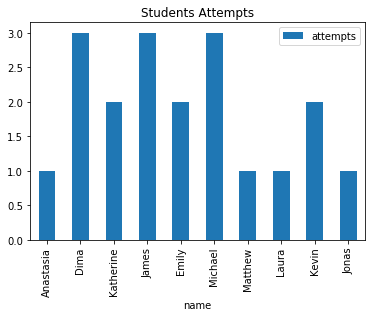

In [55]:
# Step 9: create a bar chart of all students attempts
# write your code here
#students =
#exam_df.plot(kind='bar')
exam_df.plot(kind='bar',x='name',y='attempts',title='Students Attempts')



# Classwork (start here in class)
You can start working on them right now:
- Read Chapter 1 in PD4E 
    - in particular Section 1.4 - since we did not cover it in class - but we have a separate lecture on that
- If time permits, start in on your homework. 
- Ask questions when you need help. Use this time to get help from the professor!

# Homework (do at home)
The following is due before class next week:
  - Any remaining classwork from tonight
  - DataCamp “Extracting and transforming data” assignment

Note: All work on DataCamp is logged. Don't try to fake it!

Please email [me](mailto:jtao@fairfield.edu) if you have any problems or questions.

![DSB logo](img/Dolan.jpg)
# Getting Started with Pandas

## PD4E Chapter 1: Pandas DataFrame Basics
### How do you read/manipulate/store data in Python?

faris